# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
print("sample size is ",len(df))

sample size is  130


In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Is the distribution of body temperatures normal?

In [5]:
import numpy as np
import pylab as plt
import scipy.stats as stats

In [6]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [7]:
temp=np.sort(df['temperature'])

In [8]:
temp_mean=np.mean(temp)
temp_std=np.std(temp)

In [9]:
temp_samples=np.random.normal(temp_mean,temp_std,size=1000)

In [10]:
x_norm,y_norm=ecdf(temp_samples)
x,y=ecdf(temp)

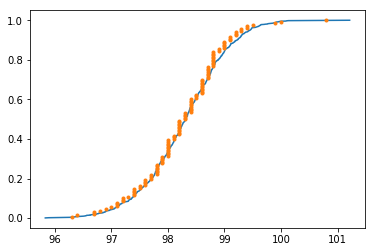

In [11]:
plt.plot(x_norm,y_norm)
plt.plot(x,y, marker='.',linestyle='none')

relatively normalized

### Is the sample size large? Are the observations independent?###

Sample size is large enough(130 > 30)and the observation are independent because 130 is less than 10% of the world's population

### Is the true population mean really 98.6 degrees F?

null hypothesis: actual mean of the human body temperature is 98.6

In [12]:
true_mean=98.6

In [13]:
print(temp_mean)

98.24923076923078


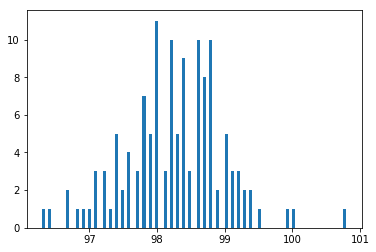

In [14]:
plt.hist(temp, bins=100)
plt.show()

In [15]:
def diff_btw_means(point1, point2):
    diff= np.mean(point1)-np.mean(point2)
    return diff

print(diff_btw_means(temp,true_mean))

-0.35076923076921673


In [16]:
def bootstrap_replicate_1d(data,func):
    return func(np.random.choice(data,size=len(data)))

In [17]:
translated_temp=temp-temp_mean+true_mean 
# assume that our temperature data has the same mean as the "given" mean

In [18]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    # Initialize array of replicates: bs_replicates
    bs_replicates=np.empty(size)
    # generate replicates
    for i in range(size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func)
        
    return bs_replicates

In [19]:
bs_replicates=draw_bs_reps(translated_temp,np.mean,10000)
print(bs_replicates)

[98.60307692 98.50538462 98.66846154 ... 98.61076923 98.50692308
 98.65230769]


In [36]:
p_boot = np.sum(bs_replicates <= temp_mean / 10000)

In [37]:
print("The p value we get from the bootstrap analysis is ",p_boot)

The p value we get from the bootstrap analysis is  0


p value is very very small, therefore the given mean and the mean we got from the sample are not the same.

because we do not know what the standard deviation of the total population is, it is impossible to perform Z test.

For t test,

null hypothesis : u = 98.6
alternate hypothesis : u= 98.24923076923078

let's say alpha level = 0.05

In [22]:
def t_test1(sample,pop_mean):
    """function for one sample t-test"""
    sample_mean=np.mean(sample)
    s=np.std(sample)
    sx=s/(len(sample)**0.5)
    t=(sample_mean-pop_mean)/sx
    return t

In [23]:
ttestresult=t_test1(temp,true_mean)
print(ttestresult)

-5.475925202078115


In [52]:
# using stats survival function to obtain the p-value 
p_t=stats.t.sf(-ttestresult,len(temp)-1)*2
print("p value obtained from t test is ",p_t) 

p value obtained from t test is  2.1887464624095246e-07


Therefore the null hypothesis that average temperature is the given mean is false

4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t and  z  statistic?

assuming that our "total population" is the given dataset, we can perform both Z test and t test.
We will first attempt t test

In [39]:
sample10=np.random.choice(temp,10)
print(sample10)

[ 97.2  98.4  98.9  99.  100.8  97.1  97.4  97.7  98.6  99. ]


In [64]:
ttestresult10 = t_test1(sample10,true_mean)
print(ttestresult10)

-0.5630031237402571


In [65]:
p_t10=stats.t.sf(ttestresult10,len(sample10)-1)*2
print("p value obtained from t test is ",p_t10) 

p value obtained from t test is  1.412817984188548


In [66]:
import statsmodels.api as sm

In [67]:
zscore,p_z10=sm.stats.ztest(sample10,value=true_mean)

In [68]:
print("p value obtained from z test is ",p_z10) 

p value obtained from z test is  0.5932642829387125


p value from both tests seem quite large implying that the null hypothesis is true. However, because the sample size is so small it is not significant.

5. At what temperature should we consider someone's temperature to be "abnormal"?

In [85]:
# get 95% confidence interval from bootstrap
bs_replicate2=draw_bs_reps(temp,np.mean,size=10000)
bootstrap_conf=np.percentile(bs_replicate2,[2.5,97.5])

# because we are using 95%, our Z value is 1.96
margin_error=1.96*np.std(temp/np.sqrt(len(temp)))

print("Temperture should be considered normal when it is between ",bootstrap_conf[0] ," and ",bootstrap_conf[1],". The margin of error for this is ",margin_error)

Temperture should be considered normal when it is between  98.12384615384616  and  98.37307692307692 . The margin of error for this is  0.12555096480257918


Therefore the true mean of 98.6 should be considered abnormally high.

6. Is there a significant difference between males and females in normal temperature?

In [94]:
male=df[df['gender']=='M'].temperature
female=df[df['gender']=='F'].temperature

In [100]:
print('male:',np.mean(male))
print('female:',np.mean(female))
print('difference:', np.mean(female)-np.mean(male))

male: 98.1046153846154
female: 98.39384615384613
difference: 0.289230769230727


it seems like there is a bit of difference in their body temperature.
We will conduct t-test on the two samples to see if this is significant

In [98]:
stats.ttest_ind(male,female,equal_var=True)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

Because p value is small enough, we can say that the two data are significantly different.
The next step will be knowing whether the environment in which the two datasets were taken similar(e.g. were men put in a colder room?) or if there was another factor that may have affected the data(e.g. were some if any of the women going through menstral period or pregnant?).